In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,5 #this controls the size of the graphs
sns.set_style('whitegrid')

In [4]:
titanic_data = pd.read_csv('/Users/JumpMan/Desktop/Fall 2022 Classes/Data Science 2/Labs/Lab 1/train.csv')
titanic_data.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Calling .index will give us the index labels(left side) and .values will give us the missing value counts for each column(right side).
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2])

# Importing and Data Exploration:

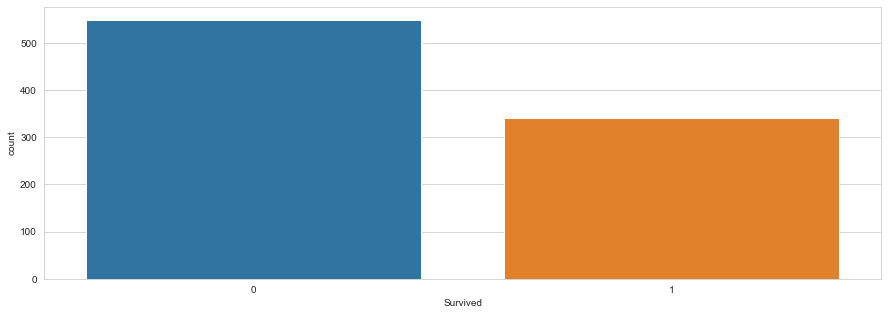

In [6]:
#This section of code will show us how many people lived or passed away.
sns.countplot(x=titanic_data['Survived'])
plt.show()

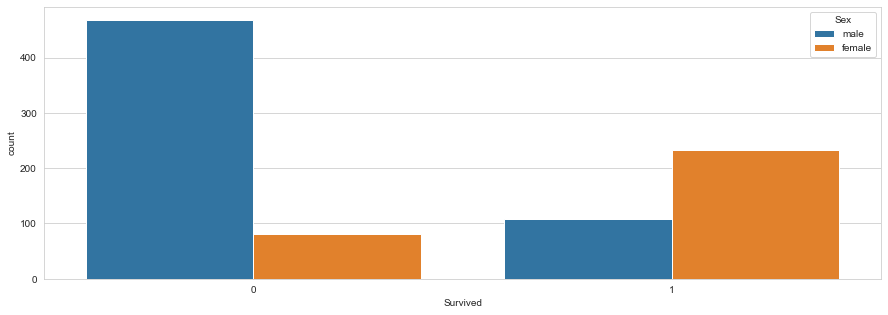

In [7]:
#Lets us see the distribution between male and female survivors
sns.countplot(x = titanic_data['Survived'], hue = 'Sex', data=titanic_data)
plt.show()

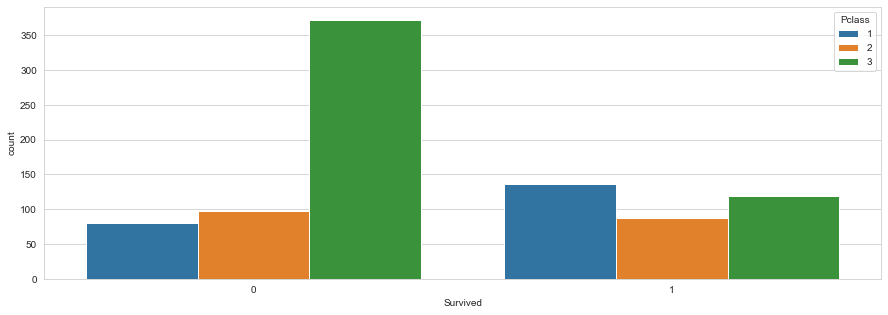

In [8]:
#How did class affect those who survived?
sns.countplot(x = titanic_data['Survived'], hue='Pclass', data = titanic_data)
plt.show()


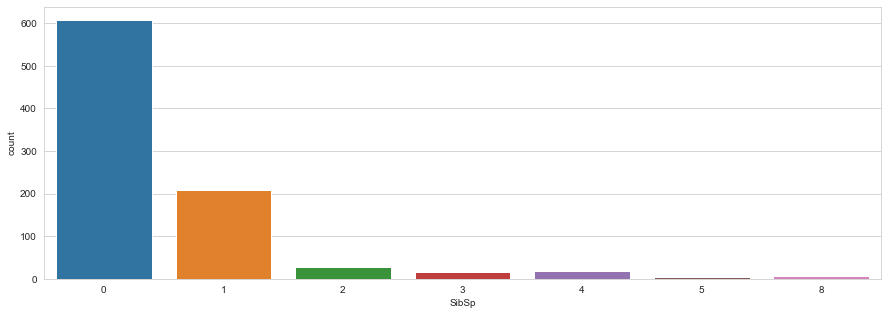

In [9]:
#Most common number of siblings on the Titanic
sns.countplot(x = titanic_data['SibSp'])
plt.show()

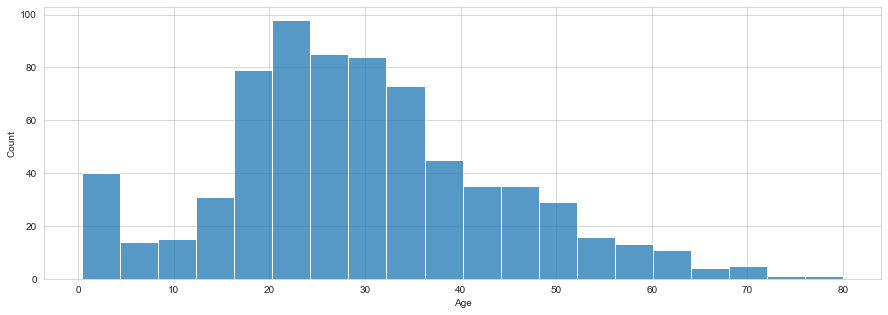

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
#Titanic age distribution
sns.histplot(x = titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

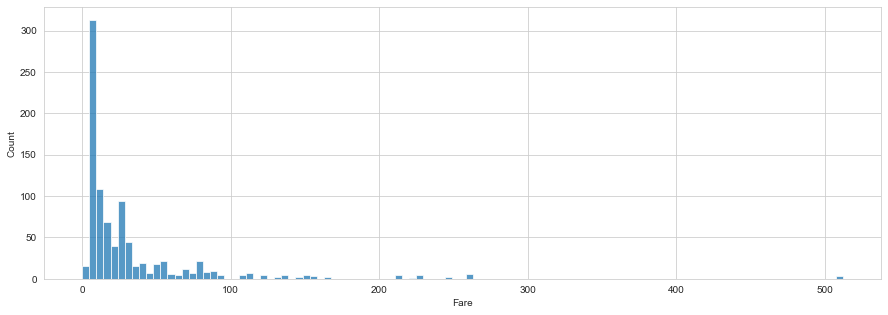

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [11]:
#This section of code will show us how much did each person 
sns.histplot(x = titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

# Data Cleaning and Preprocessing:

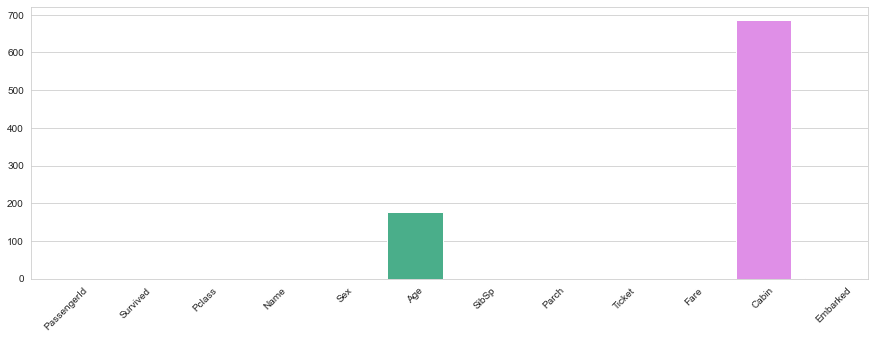

In [12]:
#Visualizing the missing data
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values) #gives us the missing values
plt.xticks(rotation = 45)
plt.show()

In [13]:
#returns the original dataframe(titanic_data), but with True and False values where there is a missing value.
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#The calling .sum()gives us back a Series telling us how many true(missing values) were in each column.
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

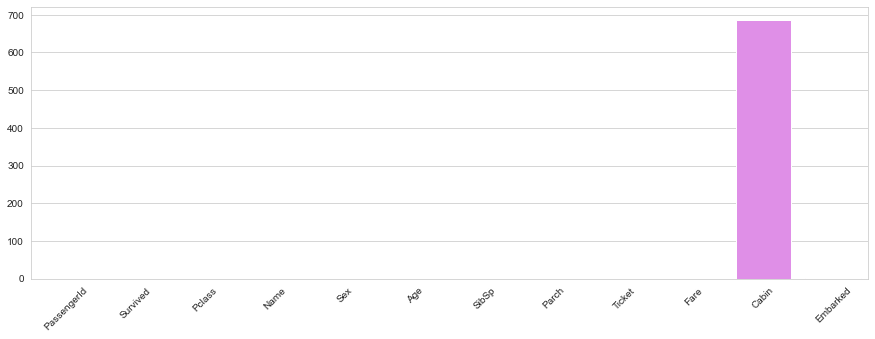

In [15]:
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)
#Getting rid of the missing data
sns.barplot(x = titanic_data.columns, y = titanic_data.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

In [16]:
#Want to check for missing values and data type
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic_data.drop(labels=['Cabin'], axis = 1, inplace = True)
titanic_data.dropna(inplace = True)

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
titanic_data = pd.get_dummies(data = titanic_data, columns=['Sex', 'Embarked'], drop_first = True)
titanic_data.drop(labels = ['Name', 'Ticket'], axis = 1, inplace = True)

In [21]:
#Now that the data is in the correct form, we're ready to begin building our model.
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Creating our Logistic Regression Model

We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. 

*This can be done using sklearn's __train_test_split(X, y, test_size)__. function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [22]:
from sklearn.model_selection import train_test_split
#This allows you to split the columns into X and y. 
#This piece of code answers alot of my personal questions.
X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 
                  'Parch', 'Fare','Sex_male', 'Embarked_Q']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


We'll now import sklearn's LogisticRegression model and begin training it using __fit(train_data, train_data_labels)__ method. In a nutshell, fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with __predict(test_data)__ method call.

In [23]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

Now that we've finished training, we can make predictions off of the test data and evaluate our model's performance using the corresponding test data labels(y_test).

In [24]:
predictions = logmodel.predict(X_test)

Since we're now dealing with classification, we'll import sklearn's __classifiction_report__ and __confusion_Matrix__ to evaluate our model. Both these take the true values and predictions as parameters.

In [25]:
#The construction of the Titanic Confusion Matrix

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       160
           1       0.75      0.65      0.70       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267

[[137  23]
 [ 37  70]]
